In [29]:
import torch.optim as optim
from torch.utils.data import DataLoader,ConcatDataset
from torchvision.datasets import ImageFolder

In [30]:
#Adjust according to your path
import sys
sys.path.append('/orfeo/cephfs/home/dssc/acesa000/Computer_Vision_Project_Cesa/functions') #Adjust according to your path

from image_handling_functions import *
from train_test_functions import *
from neural_networks import *

In [31]:
%%capture 
#Run if you don't already have the dataset
"""
!git clone https://github.com/AlessandroCesaTs/Computer_Vision_Project_Cesa.git
"""

In [32]:
#Adjust according to your path
train_path = "/orfeo/cephfs/home/dssc/acesa000/Computer_Vision_Project_Cesa/CVPR2023_project_2_and_3_data/train"
test_path = "/orfeo/cephfs/home/dssc/acesa000/Computer_Vision_Project_Cesa/CVPR2023_project_2_and_3_data/test"

In [33]:
device = get_default_device()

In [34]:
np.random.seed(123)
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
if device.type == 'cuda':
    torch.cuda.empty_cache()


In [35]:
train=ImageFolder(root=train_path,transform=resize_transformation)
test=ImageFolder(root=test_path,transform=resize_transformation)

In [36]:
#split training set into training and validation
train_size=int(0.85*len(train))
validation_size=len(train)-train_size
training_set,validation_set=torch.utils.data.random_split(train,[train_size,validation_size])

In [37]:
batch_size = 32

augmented_training_set=TransformedDataSet(training_set)
concatenated_dataset = torch.utils.data.ConcatDataset([training_set, augmented_training_set])
augmented_train_loader = DataLoader(concatenated_dataset, batch_size=batch_size,shuffle=True,pin_memory=True)

validation_loader = DataLoader(validation_set, batch_size=batch_size,shuffle=False,pin_memory=True)
test_loader = DataLoader(test, batch_size=batch_size,shuffle=False,pin_memory=True)

augmented_train_loader = DeviceDataLoader(augmented_train_loader, device)
validation_loader = DeviceDataLoader(validation_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [38]:
%%capture
"""
model = CNN2()
model.to(device)
model.apply(init_weights)
loss_function=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
"""

In [39]:
model = EnsembleModel()
model.to(device)
model.apply(init_weights)
loss_function=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

EPOCH1:
LOSS train: 2.2482470646500587 validation: 2.703704357147217 | validation_accuracy: 21.333333333333332% 
EPOCH2:
LOSS train: 1.7256948694586753 validation: 2.2722110748291016 | validation_accuracy: 29.333333333333332% 
EPOCH3:
LOSS train: 1.4776271864771844 validation: 1.9293198585510254 | validation_accuracy: 39.55555555555556% 
EPOCH4:
LOSS train: 1.2568937733769416 validation: 2.363490581512451 | validation_accuracy: 28.88888888888889% 
EPOCH5:
LOSS train: 1.0710249811410903 validation: 2.7432782649993896 | validation_accuracy: 25.77777777777778% 
EPOCH6:
LOSS train: 0.9692439310252666 validation: 1.8719844818115234 | validation_accuracy: 42.666666666666664% 
EPOCH7:
LOSS train: 0.7980649955570698 validation: 2.363234281539917 | validation_accuracy: 33.77777777777778% 
EPOCH8:
LOSS train: 0.7361792515963316 validation: 1.7698155641555786 | validation_accuracy: 43.111111111111114% 
EPOCH9:
LOSS train: 0.6698726277798415 validation: 2.0082128047943115 | validation_accuracy: 42

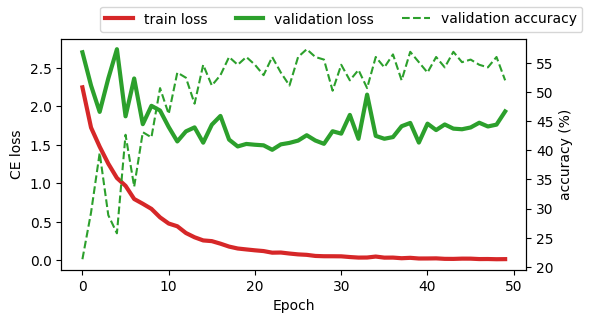

In [40]:
model_path=train_model(model,augmented_train_loader,validation_loader,loss_function,optimizer,50,device)

Accuracy of the network on the test images: 62.54606365159129%


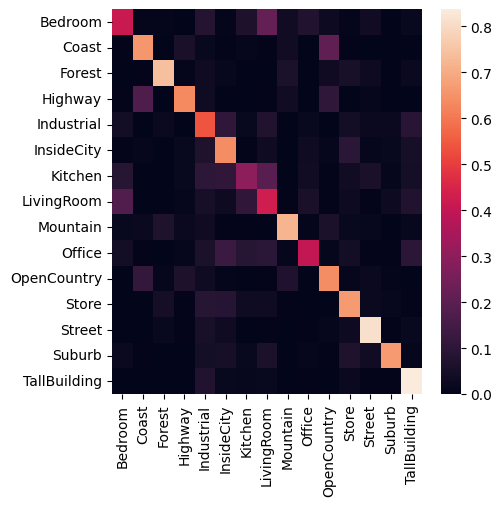

In [41]:
test_model(EnsembleModel(),model_path,test_loader,test,device)

In [42]:
!rm model*